# Rate equations

\begin{align}
\frac{d[PA]}{dt} &= k_L ([PA]_{max} - [PA])- k_T [PA]([WA]_{max} - [WA]) - k_P [E][PA] \\
\frac{d[WA]}{dt} &= k_T [PA] ([WA]_{max} - [WA]) - k_N [E][WA]^2 - k_P [E][WA] \\
\frac{d[E]}{dt} &= k_N [E] [WA]^2 - k_C [E]
\end{align}

In [180]:
from numpy import array, zeros, arange, sqrt
def nucleation(load_rate = 10.0, transfer_rate = 1.0, 
               elongation_rate = 100.0, nucleation_rate = 1.0, capping_rate = 0.1, 
               ppr_max = 1.0, wh2_max = 1.0, total_time = 300.0):
    time_interval = 1e-3
    time_row = arange(0.0, total_time, time_interval)
    no_points = len(time_row)
    ppr_row = zeros(no_points)
    wh2_row = zeros(no_points)
    ends_row = zeros(no_points)
    ends_row[0] = 1.0
    # Check constraint
    wh2_eq = sqrt(capping_rate / nucleation_rate)
    a = elongation_rate * (capping_rate + elongation_rate * wh2_eq)
    b = (load_rate + transfer_rate * (wh2_max - wh2_eq)) * (capping_rate + elongation_rate * wh2_eq)
    c = - load_rate * transfer_rate * (wh2_max - wh2_eq) * ppr_max
    ends_eq = (-b + sqrt(b**2 - 4 * a * c)) / (2 * a)
    if ends_eq < ends_row[0]:
        print('Net growth is negative')
    for i in range(0, no_points - 1):
        load_change = load_rate * (ppr_max - ppr_row[i])
        transfer_change = transfer_rate * ppr_row[i] * (wh2_max - wh2_row[i])
        ppr_elongation_change = elongation_rate * ends_row[i] * ppr_row[i]
        wh2_elongation_change = elongation_rate * ends_row[i] * wh2_row[i]
        nucleation_change = nucleation_rate * ends_row[i] * wh2_row[i]**2
        capping_change = capping_rate * ends_row[i]
        ppr_change = load_change - transfer_change - ppr_elongation_change
        wh2_change = transfer_change - nucleation_change - wh2_elongation_change
        ends_change = nucleation_change - capping_change
        ppr_row[i + 1] = ppr_row[i] + ppr_change * time_interval
        wh2_row[i + 1] = wh2_row[i] + wh2_change * time_interval
        ends_row[i + 1] = ends_row[i] + ends_change * time_interval
    return time_row, ppr_row, wh2_row, ends_row

Text(0,0.5,'$[E]$')

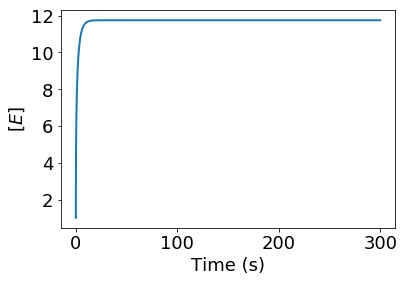

In [184]:
%matplotlib inline
from matplotlib.pyplot import subplots

time_row, ppr_row, wh2_row, ends_row = nucleation(ppr_max = 40.0, wh2_max = 500.0, nucleation_rate = 10.0)
figure_handle, axes_handle = subplots()
axes_handle.plot(time_row, ends_row, linewidth = 2)
axes_handle.tick_params(labelsize = 18)
axes_handle.set_xlabel('Time (s)', fontsize = 18)
axes_handle.set_ylabel(r'$[E]$', fontsize = 18)